In [9]:
# Importing packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# Set current working directory to your path p
p = r"D:\rorys\Documents\projects\NN\group 4"
os.chdir(p)

print(os.listdir(p))

['Flight time helicopters Leah Poppeliers.csv', 'Flight time of helicopters_Iveta Bednarikova.csv', 'Flight time of helicopters_Iveta Bednarikova1.csv', 'Helicopter Assignment_UtkuGokcen.csv', 'Helicopter Exercise_Angeliki Chronopoulou.csv', 'Helicopter Exercise_Angeliki Chronopoulou2.csv', 'Helicopters flight time.csv', 'Helicopters flight time_TimvanBrantegem.csv', 'Helicopters flight time_TimvanBrantegem2.csv', 'helicopters_IvaTuckova.xlsx', 'helicopters_IvaTuckova2.xlsx', 'helicopters_IvaTuckova3.xlsx', 'Helicopter_2_DianaDamien.csv', 'helicopter_Magda Suska.csv', 'Helicopter_result_analysis.ipynb', 'Helikopteropdracht autumn school C.A.M. Warmerdam.xlsx', 'Homework Data Science group 4_JorisVanDeuveren.csv', 'homework_WilliamWyatt.xlsx', 'Measurements tabel EllesVanZetten.xlsx']


In [14]:
# Load data
file_name = "<your file>.csv"
df_measurements = pd.read_csv(file_name, sep=";")
print(df_measurements)

   Helicopter  Hight (in meters)  No. Of paperclips Flight time (in seconds)
0        Blue                  2                  0                     2,05
1        Blue                  2                  0                     2,12
2        Blue                  2                  0                     2,32
3        Blue                  2                  0                      2,3
4        Blue                  2                  0                     2,07
5        Blue                  2                  0                     2,08
6        Blue                  2                  0                     2,19
7        Blue                  2                  0                     2,03
8        Blue                  2                  0                     2,19
9        Blue                  2                  1                     1,87
10       Blue                  2                  1                     1,94
11       Blue                  2                  1                     1,92

In [29]:
# Create new dataframe - the new dataframe will be analyzed
df = df_measurements

# preprocess the colors
color_column = 'Helicopter'

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[color_column])
df[color_column] = le.transform(df[color_column])
df[color_column] = pd.to_numeric(df[color_column])

# replace the comma by a dot
df['Flight time (in seconds)'] = pd.to_numeric(df['Flight time (in seconds)'].astype(str).str.replace(',','.'))

# Rename the columns to "X" and "Y"
df = df.rename(columns={'No. Of paperclips':'X','Flight time (in seconds)':'Y'})
print(df)

    Helicopter  Hight (in meters)  X     Y
0            0                  2  0  2.05
1            0                  2  0  2.12
2            0                  2  0  2.32
3            0                  2  0  2.30
4            0                  2  0  2.07
5            0                  2  0  2.08
6            0                  2  0  2.19
7            0                  2  0  2.03
8            0                  2  0  2.19
9            0                  2  1  1.87
10           0                  2  1  1.94
11           0                  2  1  1.92
12           0                  2  1  1.93
13           0                  2  1  2.02
14           0                  2  1  1.66
15           0                  2  1  1.95
16           0                  2  1  1.95
17           0                  2  1  2.00
18           0                  2  2  1.46
19           0                  2  2  1.74
20           0                  2  2  1.78
21           0                  2  2  1.69
22         

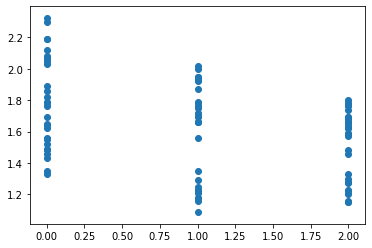

In [30]:
# Explore the dataframe
# sns.barplot(x='X',y='Y',data=df)
# sns.boxplot(x='X',y='Y',data=df)
graph = plt.scatter(x='X',y='Y',data=df)

In [20]:
# Apply linear regression from the statsmodel package 
model = sm.GLM.from_formula('Y ~ X', data=df)
fit = model.fit()
results_GLM = fit.summary()
print(results_GLM)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   87
Model:                            GLM   Df Residuals:                       85
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                        0.076468
Method:                          IRLS   Log-Likelihood:                -10.603
Date:                Fri, 11 Dec 2020   Deviance:                       6.4998
Time:                        12:32:25   Pearson chi2:                     6.50
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7648      0.047     37.648      0.0

[(0, 3), (0, 3)]

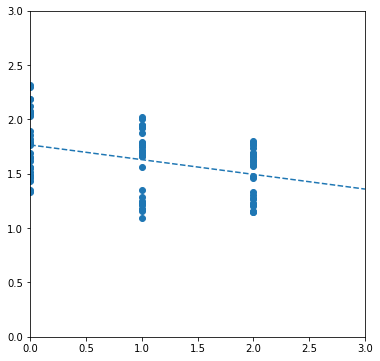

In [21]:

x = np.linspace(0,3,6)
# get the intercept and slope
params = fit.params
# Y = bX + a
y = params[1]*x+params[0]

f, ax = plt.subplots(figsize=(6, 6))
# plot the points
ax.scatter(x='X', y='Y', data=df)

# plot the regression line
ax.plot(x, y, ls="--")
ax.set(xlim=(0, 3), ylim=(0, 3))